# IMPROVE CUSTOMER SATISFACTION FOR EMIRATES AIRLINE 

In the service industry, keep high customer satisfaction is always among the top priority. Hence, for all airlines how customers view their service which reflects in overall rating is a good metric to measure the performance. Emirates airline is one of the airlines in the average range of overall rating (6/10). From 2010 to 2015, the rating for its service has not changed much. Improve certain parts in their service will definitely enhance customer satisfaction, and attract them to use the service more often or even suggest to their friends. However, Emirates needs to know where its investment would be most profitable, that is it needs to analyze cost and benefit related to increasing the performance in certain services. Therefore, in this project my aim is to provide a model where Emirates airlines can use in planning its targetted overall rating. 

### Data
The data is scraped from airlinequality.com by quankiquanki from Skytrax website: https://github.com/quankiquanki/skytrax-reviews-dataset. Skytrax website has long been a great site for customers reviews of airlines, where it collects reviews and ratings for each airlines, lounges, seats and airports.
The dataset for Emirates airline has a total sample of 691 observations with 20 columns containing information of the reviewers (name, country, date of review, type of travellers) and their ratings for each features as well as comments on the airlines. The ratings for each attribute range from 1 to 5, while overall rating is from 1 to 10. 

### Approach
* First, I build a model that can predict well the overall rating based on each feature's rating. In order to do that, I conduct OLS Linear model, Ridge linear for parameter regularization and random forest. 
* Then, I select the best model among these methods and choose the important features for airlines.
* Finally, using these features on the best models, I create a table for relative reference in planning targets for attribute ratings. This table together with Ridge model for specific metrics and cost-benefit analysis, Emirates airlines can build a good strategy on where to invest their resources to achieve better performance in customer satisfaction and profits.


### Result
* Ridge regression is the best performance on both train and test set with the lowest MSE of 1.64 on the train set. The most important factors that may affect overall rating are value-money rating, cabin staff, seat comfort, food beverages and inflight entertainment. These all have positive correlations with overall rating.

### Recommendations 
* Based on its corporate strategy and cost-benefit analysis, Emirates may use the reference table and Ridge model to plan their target for improvement in some services.
* While pricing is related closely with business strategy and positioning, Emirates might find it easier to improve its cabin staff and food beverages while still have huge effect on overall rating.

### Further research
Do topic and sentiment analysis on the travellers' reviews for Emirates airline to see which topics are most discussed, and alerts on negative reviews to take in-time action.


## Setup

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df=pd.read_csv('skytrax-reviews-dataset-master/data/airline.csv')

In [76]:
df_emi=df[df.airline_name=='emirates']
df_emi.head(2)

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
14773,emirates,/airline-reviews/emirates,Emirates customer review,B Finn,Australia,2015-08-02,Overall we found the experience disappointing....,A380,FamilyLeisure,Economy,Singapore to Paris via Dubai,5.0,3.0,1.0,2.0,3.0,4.0,3.0,3.0,0
14783,emirates,/airline-reviews/emirates,Emirates customer review,Michael Leibman,South Africa,2015-07-28,Flight from Cape Town was late into Dubai due ...,Boeing 777 and A380,Couple Leisure,Business Class,Cape Town to London via Dubai,7.0,3.0,3.0,3.0,4.0,2.0,2.0,3.0,0


In [4]:
df_emi.describe()

C:\Users\Bao Tram\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
count,690.000000,691.000000,691.000000,688.000000,688.000000,61.000000,35.000000,691.000000,691.000000
mean,6.246377,3.596237,3.287988,3.453488,4.190407,3.508197,3.142857,3.609262,0.615051
std,3.088937,1.207675,1.543425,1.351322,1.075096,1.409763,1.497898,1.329978,0.486936
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,3.000000,0.000000
50%,NaN,4.000000,4.000000,NaN,NaN,NaN,NaN,4.000000,1.000000
75%,NaN,5.000000,5.000000,NaN,NaN,NaN,NaN,5.000000,1.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [5]:
df_emi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 14773 to 15808
Data columns (total 20 columns):
airline_name                     691 non-null object
link                             691 non-null object
title                            691 non-null object
author                           691 non-null object
author_country                   690 non-null object
date                             691 non-null object
content                          691 non-null object
aircraft                         50 non-null object
type_traveller                   61 non-null object
cabin_flown                      691 non-null object
route                            61 non-null object
overall_rating                   690 non-null float64
seat_comfort_rating              691 non-null float64
cabin_staff_rating               691 non-null float64
food_beverages_rating            688 non-null float64
inflight_entertainment_rating    688 non-null float64
ground_service_rating            61 non

* From these descriptive tables, we see that we only have problem with missing values, but there is no outliers. Note that for some features, we see the min of rating is 0, which is invalid (from 1 to 5) so those are also missing values. 
* It is noticeable that data for overall rating, recommended and value_money rating are nearly full while rating data for ground service and wifi connectivity are mostly missing. Given this fact, it is highly likely that Emirates airlines do not offer these amenities in some routes. Hence, I replace those missing values by 0 instead of imputed values(mean, median). 
* The data points with missing values for overall rating will be deleted as it is our main concern. 

## Data wrangling

In the data cleaning step, I do the following:
* Only choose data since 2010
* Drop data without overall rating
* Drop information that is not needed for modelling purpose: link, title, author, author country, date, content, aircraft type, route, recommended
* Encode missing values as 0
* Get dummies for traveller type and cabin flown 

In [7]:
df_emi.date=pd.to_datetime(df_emi.date) #change date object into datetime format
df_emi=df_emi[df_emi.date>='2010-01-01'] #choose recent dates only
df_emi.shape

C:\Users\Bao Tram\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(691, 20)

In [8]:
#drop data points without overall rating
df_clean=df_emi[df_emi['overall_rating'].notnull()]

In [9]:
#drop some attributes that will not be used in modelling
df_clean.drop(['airline_name','link','title','author','author_country','date','content','aircraft','route','recommended'],axis=1, inplace=True)


C:\Users\Bao Tram\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [10]:
df_clean.head()

,type_traveller,cabin_flown,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating
14773,FamilyLeisure,Economy,5.0,3.0,1.0,2.0,3.0,4.0,3.0,3.0
14783,Couple Leisure,Business Class,7.0,3.0,3.0,3.0,4.0,2.0,2.0,3.0
14784,Couple Leisure,Economy,9.0,5.0,4.0,4.0,5.0,4.0,NaN,5.0
14794,Couple Leisure,Business Class,10.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0
14795,FamilyLeisure,Economy,6.0,4.0,3.0,5.0,5.0,3.0,1.0,3.0


In [11]:
#deal with missing values
df_clean=df_clean.fillna({'ground_service_rating':0, 'wifi_connectivity_rating':0,'seat_comfort_rating':0,'cabin_staff_rating':0,'food_beverages_rating':0,'inflight_entertainment_rating':0, 'value_money_rating':0}, inplace=True)


C:\Users\Bao Tram\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [12]:
#change types cabin flown and traveler types into category type
df_cabin_flown= pd.get_dummies(df_clean['cabin_flown'])
df_clean=pd.concat([df_clean, df_cabin_flown], axis=1)
df_clean.drop(['cabin_flown'], axis=1, inplace=True)

df_type_traveller= pd.get_dummies(df_clean['type_traveller'])
df_clean=pd.concat([df_clean, df_type_traveller], axis=1)
df_clean.drop(['type_traveller'], axis=1, inplace=True)

In [13]:
df_clean.isnull().values.any() #check if there are any missing values in dataframe

False

In [14]:
df_clean.head()

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,Business Class,Economy,First Class,Premium Economy,Business,Couple Leisure,FamilyLeisure,Solo Leisure
14773,5.0,3.0,1.0,2.0,3.0,4.0,3.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
14783,7.0,3.0,3.0,3.0,4.0,2.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14784,9.0,5.0,4.0,4.0,5.0,4.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
14794,10.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14795,6.0,4.0,3.0,5.0,5.0,3.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
df_clean.shape

(690, 16)

## Descriptive analysis

In [16]:
df_clean.corr()

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,Business Class,Economy,First Class,Premium Economy,Business,Couple Leisure,FamilyLeisure,Solo Leisure
overall_rating,1.000000,0.670180,0.810329,0.772947,0.568852,0.103665,0.064943,0.829394,0.074364,-0.120849,0.099232,0.046328,0.088609,0.075582,-0.057244,0.002258
seat_comfort_rating,0.670180,1.000000,0.551196,0.505741,0.459390,0.112242,0.117953,0.603930,0.106063,-0.176245,0.153644,0.044313,0.070033,0.035002,0.012336,0.002804
cabin_staff_rating,0.810329,0.551196,1.000000,0.735693,0.435756,0.105153,0.044169,0.711109,0.147460,-0.185545,0.089168,0.042244,0.093723,0.068379,-0.061072,0.004832
food_beverages_rating,0.772947,0.505741,0.735693,1.000000,0.521793,0.062415,0.069900,0.687278,0.028939,-0.090893,0.128433,0.043507,0.072633,0.054413,-0.058801,-0.020301
inflight_entertainment_rating,0.568852,0.459390,0.435756,0.521793,1.000000,0.023675,0.044062,0.543963,0.032046,-0.079792,0.100829,0.028443,0.027528,0.059177,-0.081091,-0.066321
ground_service_rating,0.103665,0.112242,0.105153,0.062415,0.023675,1.000000,0.678599,0.070685,-0.090116,0.063622,0.049846,-0.010948,0.334688,0.424046,0.482897,0.527587
wifi_connectivity_rating,0.064943,0.117953,0.044169,0.069900,0.044062,0.678599,1.000000,0.060752,-0.033380,-0.017401,0.107143,-0.007933,0.163993,0.392229,0.360858,0.348791
value_money_rating,0.829394,0.603930,0.711109,0.687278,0.543963,0.070685,0.060752,1.000000,-0.004692,-0.018545,0.047525,0.011115,0.050866,0.063894,-0.052787,-0.005559
Business Class,0.074364,0.106063,0.147460,0.028939,0.032046,-0.090116,-0.033380,-0.004692,1.000000,-0.884454,-0.144568,-0.023826,0.010869,-0.009221,-0.095148,-0.073271
Economy,-0.120849,-0.176245,-0.185545,-0.090893,-0.079792,0.063622,-0.017401,-0.018545,-0.884454,1.000000,-0.326910,-0.053877,-0.066227,-0.023518,0.093327,0.089486


*From the above table, we see that there are much correlations between cabin staff, food beverages rating and value money rating. Hence, there might be huge bias in case of OLS due to multi-colinearity*

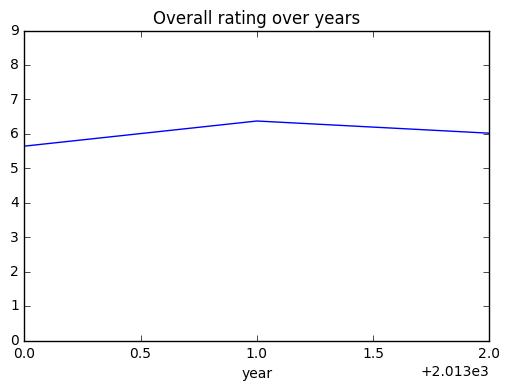

In [17]:
df_emi['year']=df_emi.date.dt.year
df_emi.groupby('year')[['overall_rating']].mean().plot()
plt.title('Overall rating over years')
plt.yticks(np.arange(0,10,1))
plt.legend().remove()
plt.show()

*The overall rating has risen slightly from around 5.7 to 6.0 point on scale of 10 in 2010-2015 period, which may suggest there has not been much improvement in rating for Emirates airlines.* 

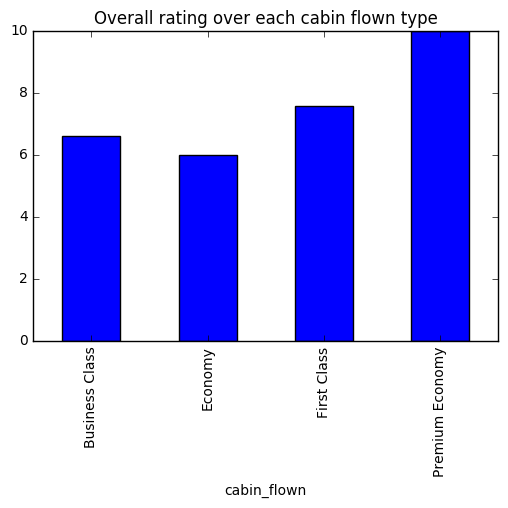

In [114]:
df_emi.groupby('cabin_flown')[['overall_rating']].mean().plot(kind='bar')
plt.title('Overall rating over each cabin flown type')
plt.legend().remove()
plt.show()

In [19]:
df_emi.groupby('cabin_flown').size()

cabin_flown
Business Class     194
Economy            461
First Class         35
Premium Economy      1
dtype: int64

*The rating is similar for economy and business class (around 6.5), while first class seems to enjoy more for Emirates service (nearly 8/10). There is only 1 data point for premium economy class, so we cannot infer much from this.*

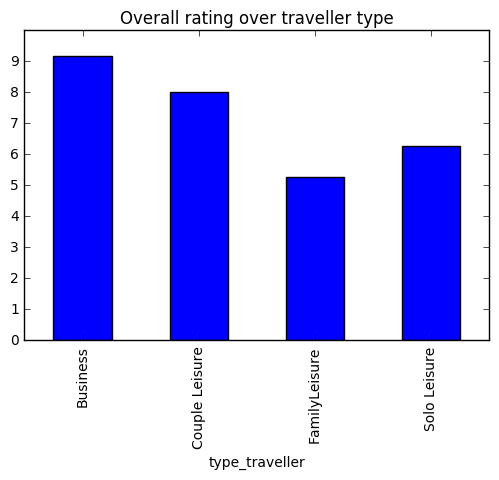

In [20]:
df_emi.groupby('type_traveller')[['overall_rating']].mean().plot(kind='bar')
plt.title('Overall rating over traveller type')
plt.yticks(np.arange(0,10,1))
plt.legend().remove()
plt.show()

*Business and couple show much more preference in Emirate services while family and solo traveller seem rather dissatisfied (less than 6 score).*

In [21]:
# Test Ho: the mean of overall rating for business/couple and family/solo traveller are equal
bi_cou=df_emi[(df_emi.type_traveller=='Business')|(df_emi.type_traveller=='Couple Leisure')].overall_rating
fa_solo=df_emi[(df_emi.type_traveller=='FamilyLeisure')|(df_emi.type_traveller=='Solo Leisure')].overall_rating
stats.ttest_ind_from_stats(bi_cou.mean(), bi_cou.std(),len(bi_cou),fa_solo.mean(), fa_solo.std(),len(fa_solo), equal_var=False)

Ttest_indResult(statistic=4.1861727820116901, pvalue=0.00010667963246993432)

*p_value< 0.01, so we can reject the null hypothesis. We may then continue to segment to see what accounts for the difference* 

In [115]:
df_emi.groupby(['type_traveller']).size()

type_traveller
Business           6
Couple Leisure    12
FamilyLeisure     22
Solo Leisure      21
dtype: int64

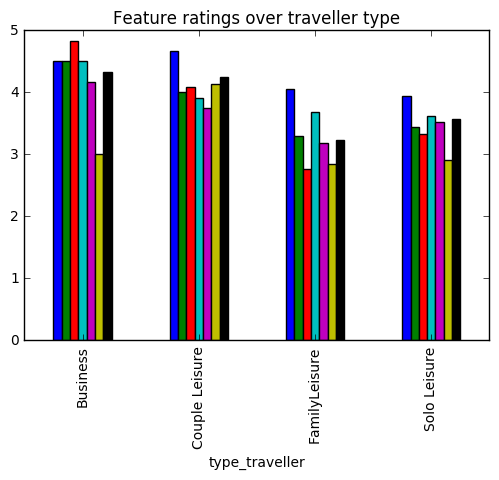

In [122]:
df_emi.groupby('type_traveller')[['inflight_entertainment_rating','food_beverages_rating','cabin_staff_rating','seat_comfort_rating','ground_service_rating','wifi_connectivity_rating','value_money_rating']].mean().plot(kind='bar')
plt.title('Feature ratings over traveller type')
plt.legend().remove()
plt.show()

In [110]:
# Test Ho: the mean of cabin staff rating for business/couple and family/solo traveller are equal
bi_cou=df_emi[(df_emi.type_traveller=='Business')|(df_emi.type_traveller=='Couple Leisure')].cabin_staff_rating
fa_solo=df_emi[(df_emi.type_traveller=='FamilyLeisure')|(df_emi.type_traveller=='Solo Leisure')].cabin_staff_rating
stats.ttest_ind_from_stats(bi_cou.mean(), bi_cou.std(),len(bi_cou),fa_solo.mean(), fa_solo.std(),len(fa_solo), equal_var=False)

Ttest_indResult(statistic=3.7196955548938462, pvalue=0.00051275623888871811)

 *Cabin staff and value money ratings are significantly lower for Family and Solo travellers than Business or couple.*

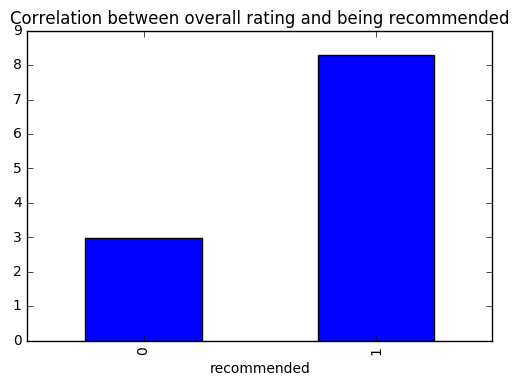

In [22]:
df_emi.groupby('recommended')[['overall_rating']].mean().plot(kind='bar')
plt.title('Correlation between overall rating and being recommended')
plt.yticks(np.arange(0,10,1))
plt.legend().remove()
plt.show()

*This shows strong positive correlation between overall rating and being recommended. Hence, we only choose one for our analysis* 

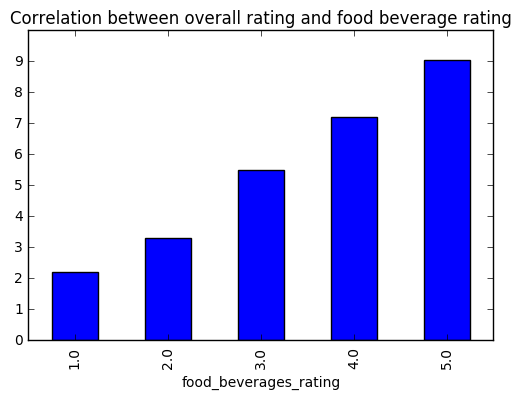

In [23]:
df_emi.groupby('food_beverages_rating')[['overall_rating']].mean().plot(kind='bar')
plt.title('Correlation between overall rating and food beverage rating')
plt.yticks(np.arange(0,10,1))
plt.legend().remove()
plt.show()

*This relationship also makes sense. The higher score for food beverages, the higher the overall score.*

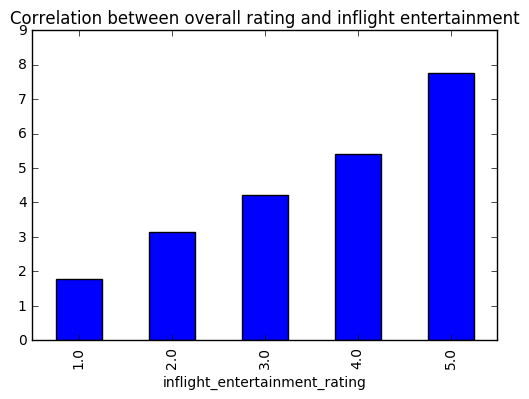

In [24]:
df_emi.groupby('inflight_entertainment_rating')[['overall_rating']].mean().plot(kind='bar')
plt.title('Correlation between overall rating and inflight entertainment')
plt.yticks(np.arange(0,10,1))
plt.legend().remove()
plt.show()

## Modelling

In order to get the most important features that may affect overall rating, the following steps are conducted:
    * Classifiers: OLS, Ridge regression,  Random forest
    * Divide dataset into train/testset (0.75/0.25), grid search and cross validation with 5 folds 
    * Metrics: mean squared error

In [25]:
y=df_clean.overall_rating
X=df_clean.drop(['overall_rating'], axis=1)

In [26]:
from sklearn.model_selection import train_test_split
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X,y,random_state=1)
from sklearn.metrics import mean_squared_error

### Linear regression with and without Ridge regularization

In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
model = Ridge()
model.fit(Xlr, ylr)
param_grid = {'alpha':[0,0.1,0.5,0.7,1.0,5.0,7.0, 10.0,12,15,20,25,70,80,100]} #alpha=0 is actually OLS regression
grid = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error')
grid.fit(Xlr, ylr)
best_params = grid.best_params_
model = grid.best_estimator_
score = grid.best_score_

print(str(best_params))
print('mean squared error on train set',abs(score))
print('mean squared error on test set:', mean_squared_error(ytestlr,model.predict(Xtestlr)))

{'alpha': 70}
mean squared error on train set 1.63583487675
mean squared error on test set: 1.7125700034


*The best model is with Ridge regularization for alpha=70, which means it performs better than OLS (alpha=0)*

In [65]:
pd.DataFrame(list(zip(Xlr.columns, model.coef_)), columns =['Features', 'Estimated Coefficients']).sort_values('Estimated Coefficients', ascending=False)

,Features,Estimated Coefficients
6,value_money_rating,0.693824
1,cabin_staff_rating,0.611933
2,food_beverages_rating,0.508751
0,seat_comfort_rating,0.413674
3,inflight_entertainment_rating,0.204450
4,ground_service_rating,0.085897
14,Solo Leisure,0.064152
7,Business Class,0.061356
12,Couple Leisure,0.019995
10,Premium Economy,0.012398


*So the ratings for value money, cabin staff, food beverages, seat comfort and inflight entertainment have the most impact on the overall rating.* 

### Random forest

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
forest=RandomForestRegressor(random_state=1)
param_grid = {"max_features"   : ["sqrt","log2", "auto"],
            "n_estimators"     : [200, 2000],
           "max_depth"         : [2, 200],
           "min_samples_split" : [2, 20]}
%timeit
grid_search = GridSearchCV(forest, param_grid, n_jobs=-1, cv=5, scoring='mean_squared_error')
grid_search.fit(Xlr, ylr)
print(grid_search.best_params_)
samples_splits,max_features,n_estimator,max_depth =grid_search.best_params_.values()
print('best mean squared error:',grid_search.best_score_*(-1))

{'min_samples_split': 20, 'max_features': 'sqrt', 'n_estimators': 2000, 'max_depth': 200}
best mean squared error: 1.78227047001


In [70]:
forest1=RandomForestRegressor(random_state=1,n_estimators=n_estimator, min_samples_split=samples_splits,
                             max_depth=max_depth, max_features=max_features).fit(Xlr,ylr)
importances = forest1.feature_importances_
names=list(Xlr.columns.values)
features = []
indices = np.argsort(importances)[::-1]

for f in range(len(importances)):
    print("%d. feature %d (%f), %s" % (f + 1, indices[f], importances[indices[f]], names[indices[f]]))
    features.append(indices[f])
    # Print only first 10 most important variables
    if len(features) >= 10:
        break
featurenames = [names[feature] for feature in features]

1. feature 6 (0.310766), value_money_rating
2. feature 1 (0.261628), cabin_staff_rating
3. feature 2 (0.200949), food_beverages_rating
4. feature 0 (0.119813), seat_comfort_rating
5. feature 3 (0.079979), inflight_entertainment_rating
6. feature 4 (0.007259), ground_service_rating
7. feature 8 (0.005816), Economy
8. feature 9 (0.003740), First Class
9. feature 7 (0.003193), Business Class
10. feature 5 (0.002481), wifi_connectivity_rating


Feature ranking:


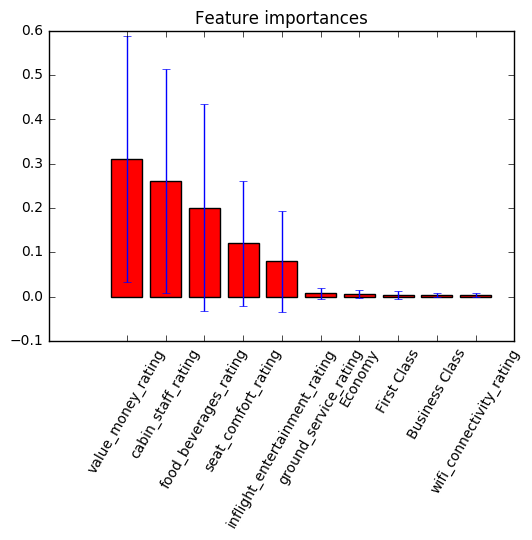

In [73]:
std = np.std([tree.feature_importances_ for tree in forest1.estimators_],axis=0)

# Plot the feature importances of the forest
print('Feature ranking:')
fig=plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices[0:10]],
       color="r", yerr=std[indices[0:10]], align="center")
plt.xticks(range(len(features)), featurenames,rotation=60)
plt.show()
fig.savefig('feature important.png')

In [75]:
print('mean squared error on train set:', grid_search.best_score_*(-1))
print('mean squared error on test set:', mean_squared_error(ytestlr,forest1.predict(Xtestlr)))

mean squared error on train set: 1.78227047001
mean squared error on test set: 1.66483104551


#### Result analysis

*With the smallest MSE, we see that Ridge regression perform the best among these 3 models for both train and test set. Hence, we will use Ridge regression for building our model.*

**Model in use**

*In the following, I group the rating for each feature where 1-3 is recorded as low, and 4-5 as high. Then, I take the median of predicted overall rating over these subsets of each feature. *

In [40]:
data_predict=Xtestlr.copy()
data_predict['Value money']=(data_predict.value_money_rating<=3)*1
data_predict['Cabin']=(data_predict.cabin_staff_rating<=3)*1
data_predict['Seat comfort']=(data_predict.seat_comfort_rating<=3)*1
data_predict['Food beverages']=(data_predict.food_beverages_rating<=3)*1
data_predict['Inflight entertainment']=(data_predict.inflight_entertainment_rating<=3)*1
data_predict['Overall rating']=model.predict(Xtestlr)

In [61]:
table=pd.pivot_table(data=data_predict,columns=None, index=['Value money','Cabin','Seat comfort','Food beverages','Inflight entertainment'],values='Overall rating', aggfunc='median')
table1=pd.DataFrame(table)
table1.rename(index={0:'high',1:'low'}, inplace=True)
table1

Overall rating
Value money Cabin Seat comfort Food beverages Inflight entertainment                
high        high  high         high           high                          9.181099
                                              low                           8.378324
                               low            high                          7.699526
                                              low                           7.142763
                  low          high           high                          7.640549
                               low            high                          6.793346
            low   high         high           high                          6.168027
                                              low                           6.493619
                               low            high                          6.298692
                                              low                           5.984868
                  low          high           high                          6.284395
                               low            high                          5.229855
                                              low                           4.210687
low         high  high         high           high                          6.655929
                                              low                           5.579597
                               low            high                          7.117185
                                              low                           5.698527
                  low          high           high                          6.284311
                                              low                           5.303611
                               low            high                          5.484529
                                              low                           3.414699
            low   high         high           high                          5.295979
                               low            high                          3.967327
                                              low                           3.558426
                  low          high           high                          4.301720
                               low            high                          2.680576
                                              low                           1.528502

**The above table can serve as a relative reference for setting targets in rating.** 

*One approach is that after setting goal for overall rating, Emirates can use this table together to visualize metrics for attributes. Then it can plug in some different sets of specific number for each feature rating in Ridge model to get the expected overall rating. Finally, Emirates might use this result in benefit-cost analysis to set goals for the ratings in these features.*
